In [1]:
from helpers import *
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,10)
pd.set_option("display.float_format", "{:.6f}".format)

# Dataset elegido

El dataset es bla bla bla [disponible aquí](https://www.kaggle.com/datasets/akshatgupta7/crop-yield-in-indian-states-dataset)

In [2]:
crops = pd.read_csv("../datasets/crop_yield.csv")
crops

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.000000,56708,2051.400000,7024878.380000,22882.340000,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.000000,4685,2051.400000,631643.290000,2057.470000,0.710435
2,Castor seed,1997,Kharif,Assam,796.000000,22,2051.400000,75755.320000,246.760000,0.238333
3,Coconut,1997,Whole Year,Assam,19656.000000,126905000,2051.400000,1870661.520000,6093.360000,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.000000,794,2051.400000,165500.630000,539.090000,0.420909
...,...,...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.000000,2000,1498.000000,395200.000000,1160.000000,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.000000,3000,1498.000000,98800.000000,290.000000,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.000000,440900,1356.200000,29586735.110000,96373.730000,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.000000,5488,1356.200000,26242746.820000,85481.260000,0.016667


## Caracteristicas

### Columnas

In [3]:
crops.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

### Valores nulos

In [4]:

crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


No tiene valores nulos

### Descripción general

In [5]:
crops.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,19689.000000,19689.000000,19689.000000,19689.000000,19689.000000,19689.000000
mean,2009.127584,179926.570308,16435941.273097,1437.755177,24103312.448806,48848.353392,79.954009
std,6.498099,732828.675888,263056839.812568,816.909589,94946004.482527,213287.354860,878.306193
min,1997.000000,0.500000,0.000000,301.300000,54.170000,0.090000,0.000000
25%,2004.000000,1390.000000,1393.000000,940.700000,188014.620000,356.700000,0.600000
50%,2010.000000,9317.000000,13804.000000,1247.600000,1234957.440000,2421.900000,1.030000
75%,2015.000000,75112.000000,122718.000000,1643.700000,10003847.200000,20041.700000,2.388889
max,2020.000000,50808100.000000,6326000000.000000,6552.700000,4835406877.000000,15750511.000000,21105.000000


### Computación de temporada de cosecha

In [6]:
crops["Season"] = crops["Season"].apply(lambda x: x.strip())
crops["Season"].unique()

array(['Whole Year', 'Kharif', 'Rabi', 'Autumn', 'Summer', 'Winter'],
      dtype=object)

In [7]:
crops["SeasonNorm"] = crops["Season"].replace({"Kharif": "Autumn", "Rabi": "Spring"})
crops["SeasonNorm"].unique()

array(['Whole Year', 'Autumn', 'Spring', 'Summer', 'Winter'], dtype=object)

### Tipos de cultivo

In [8]:
print(crops["Crop"].value_counts().shape)
crops["Crop"].unique()

(55,)


array(['Arecanut', 'Arhar/Tur', 'Castor seed', 'Coconut ', 'Cotton(lint)',
       'Dry chillies', 'Gram', 'Jute', 'Linseed', 'Maize', 'Mesta',
       'Niger seed', 'Onion', 'Other  Rabi pulses', 'Potato',
       'Rapeseed &Mustard', 'Rice', 'Sesamum', 'Small millets',
       'Sugarcane', 'Sweet potato', 'Tapioca', 'Tobacco', 'Turmeric',
       'Wheat', 'Bajra', 'Black pepper', 'Cardamom', 'Coriander',
       'Garlic', 'Ginger', 'Groundnut', 'Horse-gram', 'Jowar', 'Ragi',
       'Cashewnut', 'Banana', 'Soyabean', 'Barley', 'Khesari', 'Masoor',
       'Moong(Green Gram)', 'Other Kharif pulses', 'Safflower',
       'Sannhamp', 'Sunflower', 'Urad', 'Peas & beans (Pulses)',
       'other oilseeds', 'Other Cereals', 'Cowpea(Lobia)',
       'Oilseeds total', 'Guar seed', 'Other Summer Pulses', 'Moth'],
      dtype=object)

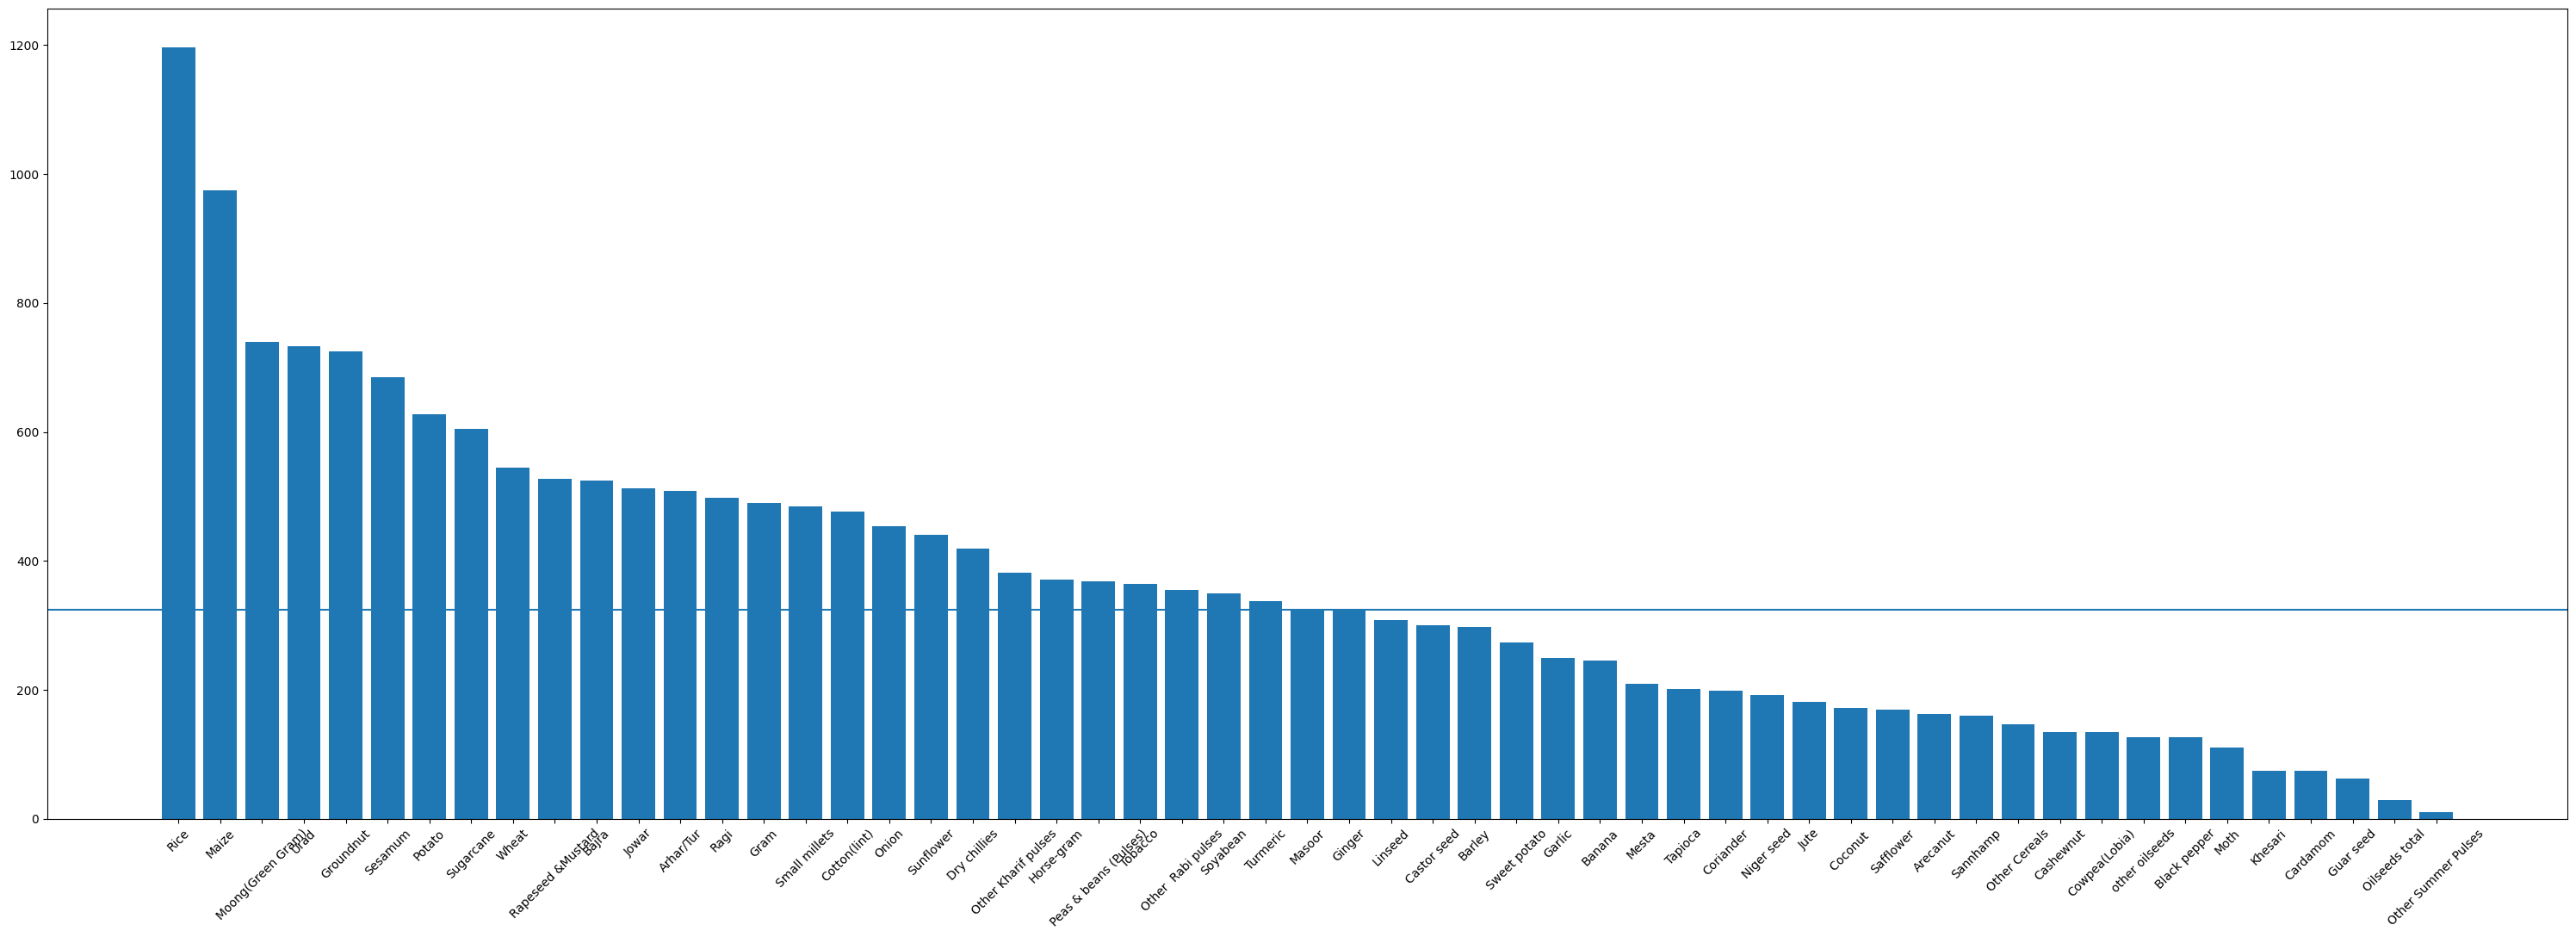

In [9]:
fig, ax = plt.subplots()
plt.tight_layout()
ax.bar(crops["Crop"].value_counts().index,crops["Crop"].value_counts().values)
ax.tick_params(axis='x', labelrotation=45)
ax.axhline(crops["Crop"].value_counts().median())
plt.show()

### Area

In [10]:
print(crops["Area"].describe().apply('{:.6f}'.format))
print(crops[iqr(crops["Area"])]["Area"].describe())


count       19689.000000
mean       179926.570308
std        732828.675888
min             0.500000
25%          1390.000000
50%          9317.000000
75%         75112.000000
max      50808100.000000
Name: Area, dtype: object
count    16613.000000
mean     23798.947837
std      39055.535408
min          0.500000
25%        938.000000
50%       5350.000000
75%      26407.000000
max     185670.000000
Name: Area, dtype: float64


### Año del cultivo

In [11]:
print(len(crops["Crop_Year"].unique()))
crops["Crop_Year"].unique()

24


array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020])

### State

In [12]:
print(len(crops["State"].unique()))
crops["State"].unique()

30


array(['Assam', 'Karnataka', 'Kerala', 'Meghalaya', 'West Bengal',
       'Puducherry', 'Goa', 'Andhra Pradesh', 'Tamil Nadu', 'Odisha',
       'Bihar', 'Gujarat', 'Madhya Pradesh', 'Maharashtra', 'Mizoram',
       'Punjab', 'Uttar Pradesh', 'Haryana', 'Himachal Pradesh',
       'Tripura', 'Nagaland', 'Chhattisgarh', 'Uttarakhand', 'Jharkhand',
       'Delhi', 'Manipur', 'Jammu and Kashmir', 'Telangana',
       'Arunachal Pradesh', 'Sikkim'], dtype=object)

---

### Rainfall by state

<Axes: ylabel='State'>

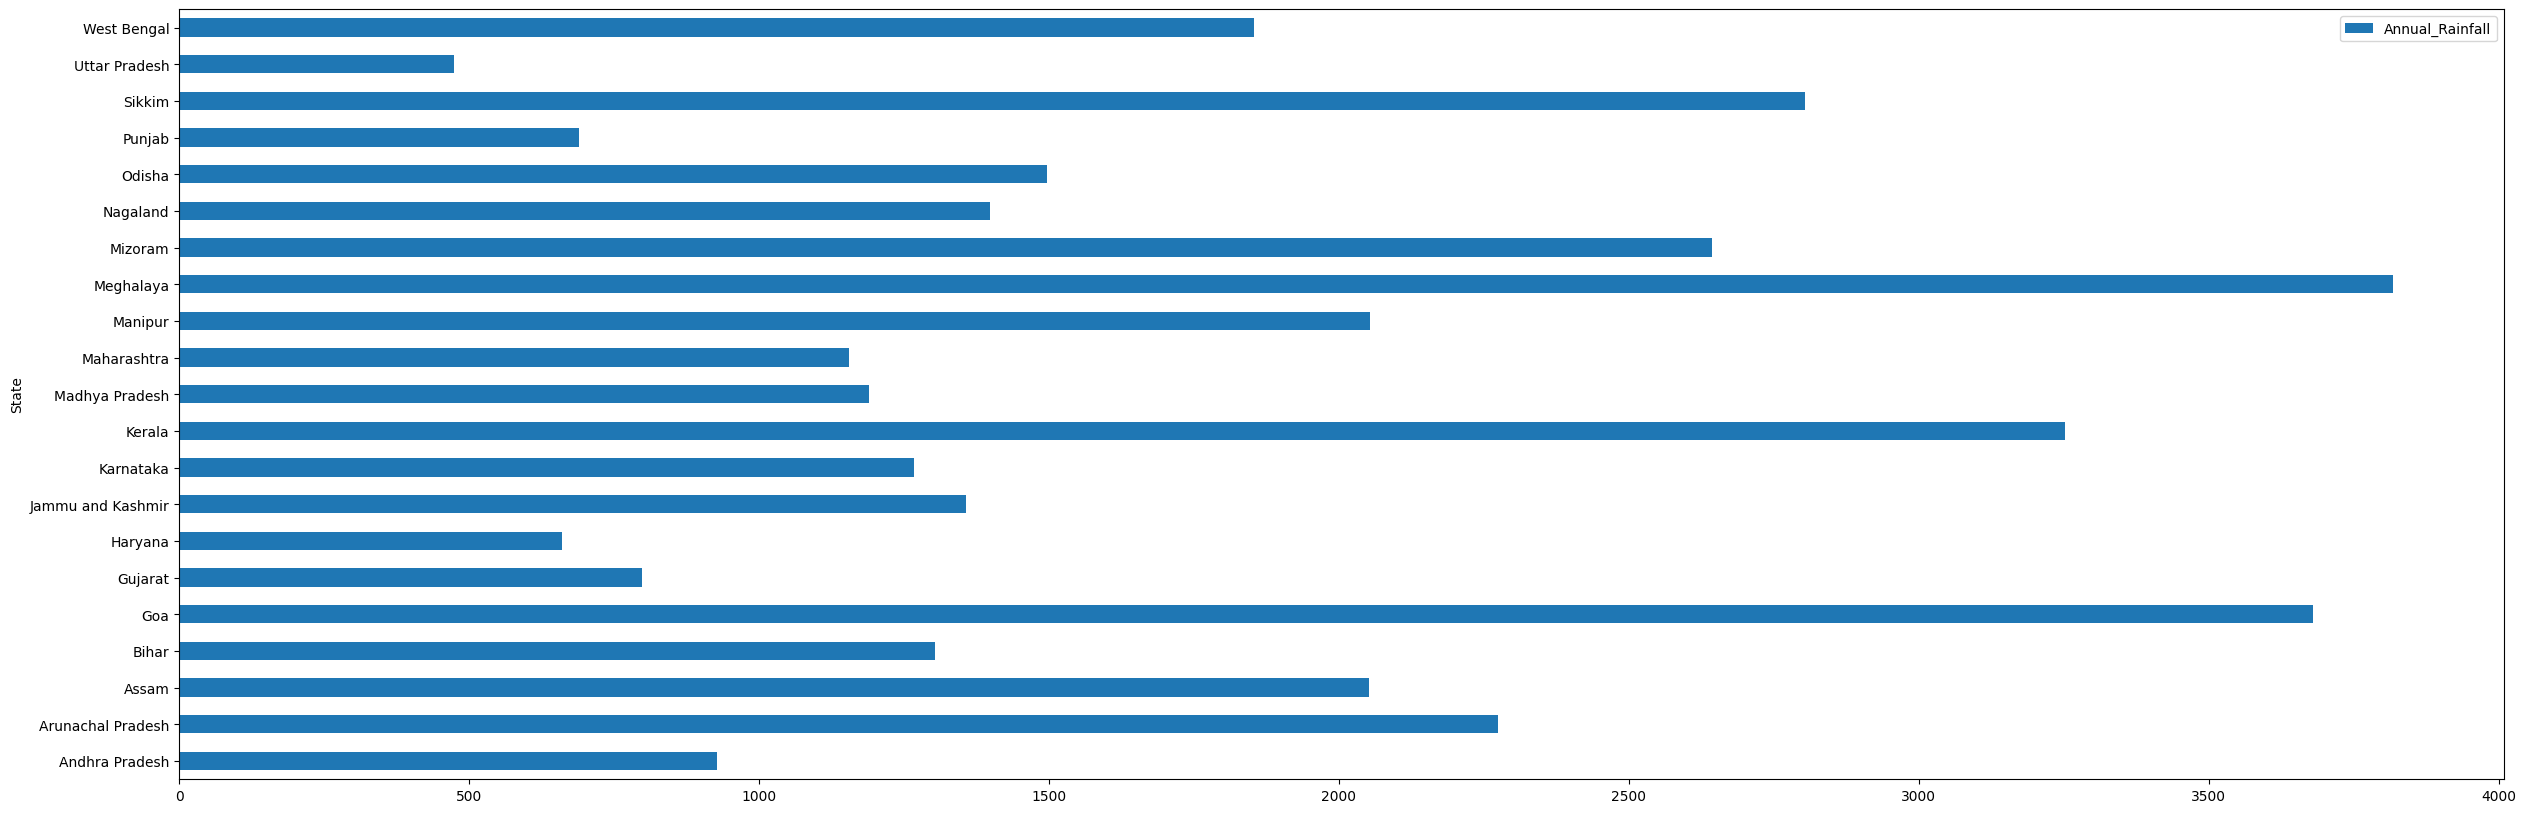

In [13]:
byYear = crops.groupby(["Crop_Year","State"])
anno1997 = byYear["Annual_Rainfall"].max()[1997].reset_index()
anno1997.plot.barh(x="State", y="Annual_Rainfall")

---

### Rainfall

In [14]:
print(crops["Annual_Rainfall"].describe())
crops["Annual_Rainfall"][iqr(crops["Annual_Rainfall"])].describe()

count   19689.000000
mean     1437.755177
std       816.909589
min       301.300000
25%       940.700000
50%      1247.600000
75%      1643.700000
max      6552.700000
Name: Annual_Rainfall, dtype: float64


count   18162.000000
mean     1259.664330
std       499.117155
min       301.300000
25%       918.100000
50%      1203.800000
75%      1532.000000
max      2678.500000
Name: Annual_Rainfall, dtype: float64

In [15]:
print(crops["Production"].describe())
print(crops["Production"][iqr(crops["Production"])].describe())

count        19689.000000
mean      16435941.273097
std      263056839.812568
min              0.000000
25%           1393.000000
50%          13804.000000
75%         122718.000000
max     6326000000.000000
Name: Production, dtype: float64
count    16316.000000
mean     34411.232287
std      60058.553653
min          0.000000
25%        849.750000
50%       6237.500000
75%      36149.750000
max     304516.000000
Name: Production, dtype: float64


### Fertilizer

In [16]:
print(crops["Fertilizer"].describe())
print(crops["Fertilizer"][iqr(crops["Fertilizer"])].describe())

count        19689.000000
mean      24103312.448806
std       94946004.482527
min             54.170000
25%         188014.620000
50%        1234957.440000
75%       10003847.200000
max     4835406877.000000
Name: Fertilizer, dtype: float64
count      16596.000000
mean     3137241.779961
std      5105540.190299
min           54.170000
25%       126967.665000
50%       719720.370000
75%      3567292.560000
max     24682894.830000
Name: Fertilizer, dtype: float64


### Pesticide

In [17]:
print(crops["Pesticide"].describe())
print(crops["Pesticide"][iqr(crops["Pesticide"])].describe())

count      19689.000000
mean       48848.353392
std       213287.354860
min            0.090000
25%          356.700000
50%         2421.900000
75%        20041.700000
max     15750511.000000
Name: Pesticide, dtype: float64
count   16653.000000
mean     6349.525176
std     10446.436277
min         0.090000
25%       247.500000
50%      1411.920000
75%      7012.500000
max     49550.860000
Name: Pesticide, dtype: float64


### Yield

In [18]:
print(crops["Yield"].describe())
print(crops["Yield"][iqr(crops["Yield"])].describe())

count   19689.000000
mean       79.954009
std       878.306193
min         0.000000
25%         0.600000
50%         1.030000
75%         2.388889
max     21105.000000
Name: Yield, dtype: float64
count   16624.000000
mean        1.177561
std         0.933590
min         0.000000
25%         0.542500
50%         0.888452
75%         1.522000
max         5.070800
Name: Yield, dtype: float64


### Variables de estudio

In [19]:
VARIABLES = ["Annual_Rainfall", "Pesticide", "Fertilizer"]

Remuevo outliers de los valores de estudio y el target

In [20]:
for var in VARIABLES:
    crops[var] = crops[var][iqr(crops[var])]
crops["Yield"] = crops["Yield"][iqr(crops["Yield"])]
crops = crops.dropna()

### Correlación de yield

In [21]:
def correlacion_rinde(df: pd.DataFrame) -> None:
    print("---")
    for factor in VARIABLES:
        print(factor, df["Yield"].corr(df[factor]))
    print("---")

def correlacion_alta(df: pd.DataFrame, threshold:float = 0.5) -> bool:
    for factor in VARIABLES:
        if abs(df["Yield"].corr(df[factor])) > threshold:
            return True
    return False

correlacion_rinde(crops)

---
Annual_Rainfall 0.04395511900814815
Pesticide 0.05268134866312253
Fertilizer 0.053824151612734614
---


### Filtro solo cultivos de interés

In [22]:
high_corr_crops = {}
for crop in crops["Crop"]:
    filtered = crops[crops["Crop"] == crop][VARIABLES + ["Crop_Year","Yield"]]
    if correlacion_alta(filtered, 0.4):
        high_corr_crops[crop] = filtered

c:\Users\masou\Dev\FLACSOCienciaDeDatos\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\masou\Dev\FLACSOCienciaDeDatos\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\masou\Dev\FLACSOCienciaDeDatos\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\masou\Dev\FLACSOCienciaDeDatos\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [23]:
high_corr_crops.keys()

dict_keys(['Mesta', 'Sweet potato', 'Tapioca', 'Rice', 'Barley', 'Sannhamp', 'Jute', 'Oilseeds total', 'Other Summer Pulses', 'Coconut '])

Me quedo solo con los que crecen en Argentina

In [24]:
cultivos_nacionales = ["Sweet potato", "Tapioca", "Rice", "Barley", "Oilseeds total"]
work_dfs = {k:v for k,v in high_corr_crops.items() if k in cultivos_nacionales}
work_dfs.keys()

dict_keys(['Sweet potato', 'Tapioca', 'Rice', 'Barley', 'Oilseeds total'])

Genero un dataset con la información de esas variables sumadas por año

In [25]:
def yearly_crop_sum_by_state(df:pd.DataFrame) -> "pd.DataFrameGroupBy":
    return df.pivot_table(index="Crop_Year", values=["Annual_Rainfall", "Fertilizer","Pesticide", "Yield"], aggfunc="sum")

In [26]:
for name,_df in work_dfs.items():
    print(name)
    correlacion_rinde(_df)
    name = name.replace(" ","_")
    by_year = yearly_crop_sum_by_state(_df)
    #Remover el año 2020 si existiera
    try:
        by_year = by_year.drop(2020)
    except KeyError:
        pass
    by_year.reset_index().to_csv(f"./cultivos/{name}.csv", index=False)

Sweet potato
---
Annual_Rainfall 0.6141924180705325
Pesticide 0.38054650292528597
Fertilizer 0.4233504987978509
---
Tapioca
---
Annual_Rainfall 0.4579063888262729
Pesticide 0.3906192118226413
Fertilizer 0.437260676996881
---
Rice
---
Annual_Rainfall -0.20845719645224597
Pesticide -0.4380228460769029
Fertilizer -0.4616052713975158
---
Barley
---
Annual_Rainfall -0.5204542562009394
Pesticide 0.24533939431195623
Fertilizer 0.23852729299460843
---
Oilseeds total
---
Annual_Rainfall -0.8492418927656816
Pesticide 0.9026115264833457
Fertilizer 0.9652834888125917
---


---

## Gráficos de datasets de trabajo

In [27]:
from glob import glob
from pathlib import Path
work_dfs = {}
for file in glob("./cultivos/*.csv"):
    df = pd.read_csv(file)
    filename= Path(file).stem
    work_dfs[filename] = df
    
work_dfs.keys()

dict_keys(['Barley', 'Oilseeds_total', 'Rice', 'Sweet_potato', 'Tapioca'])

### Pesticide

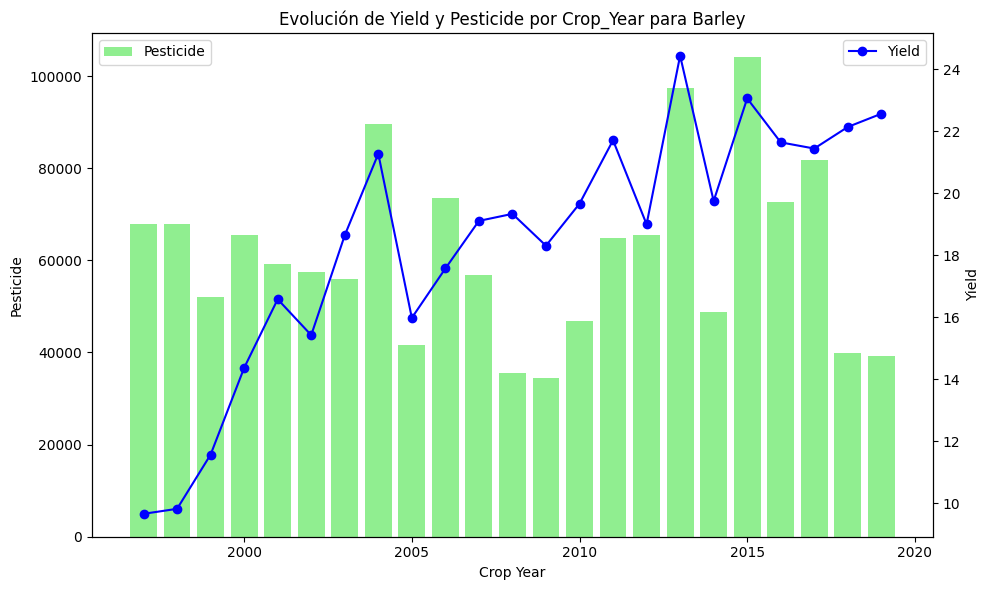

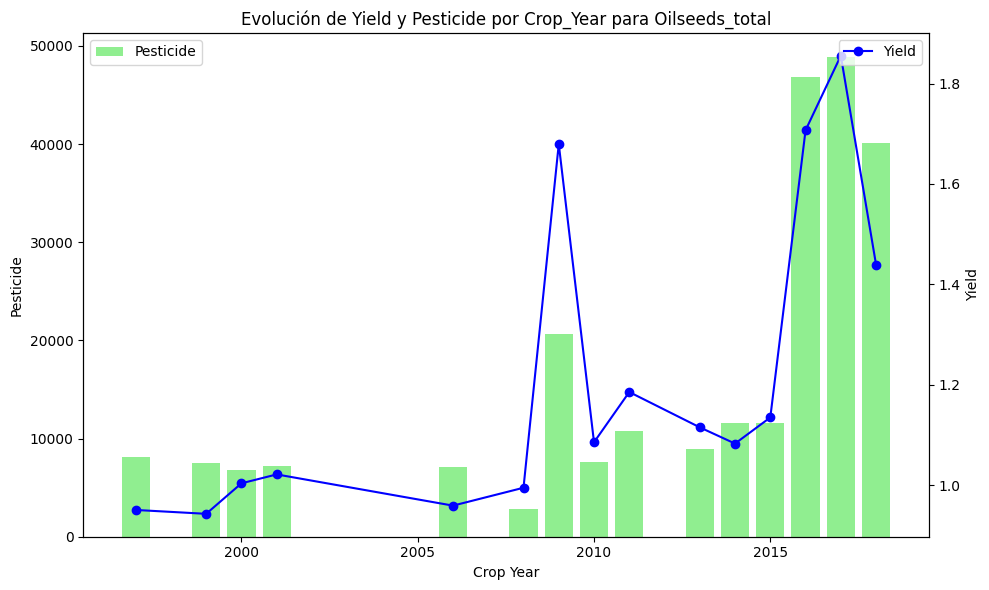

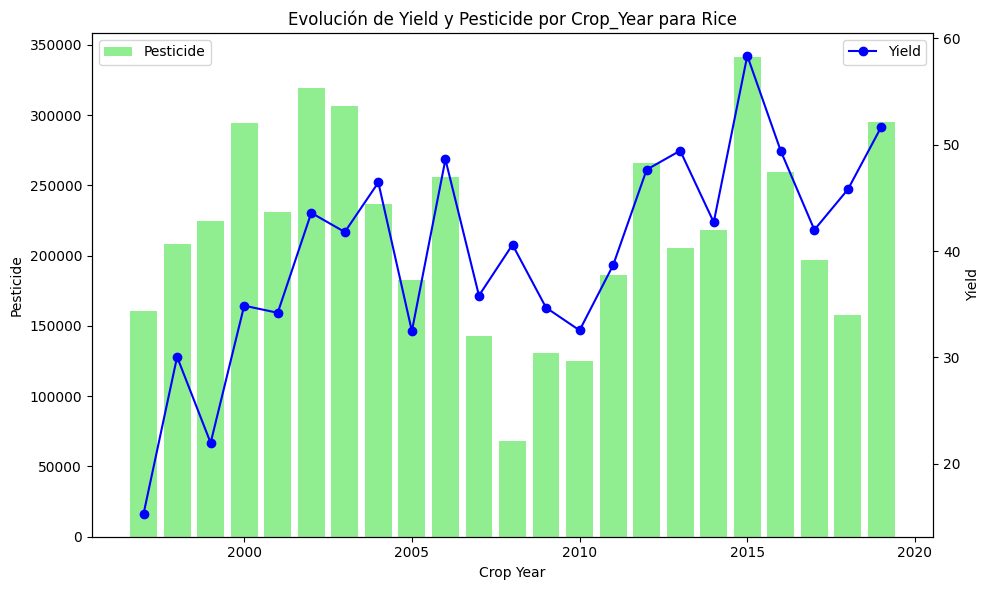

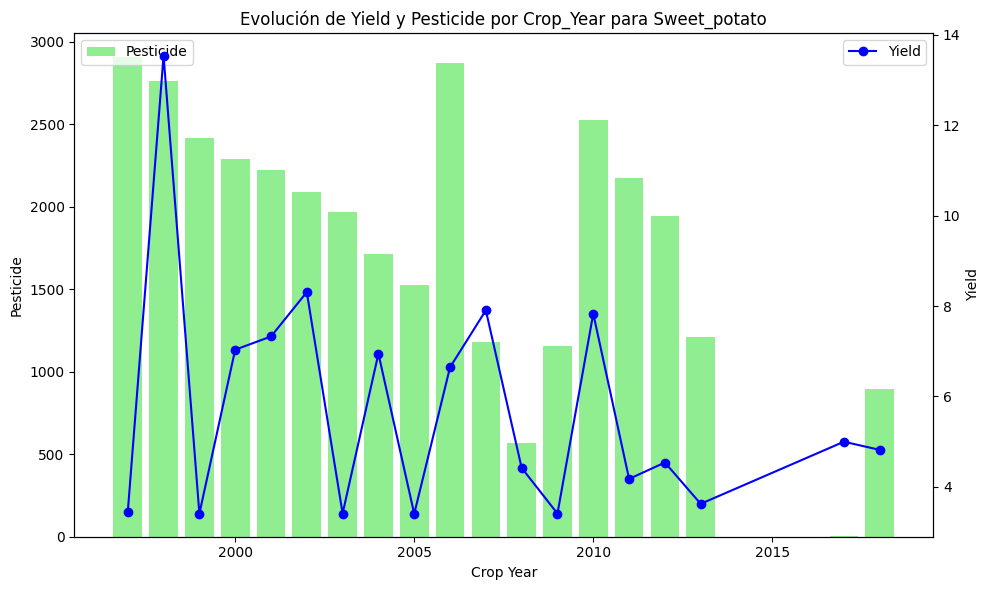

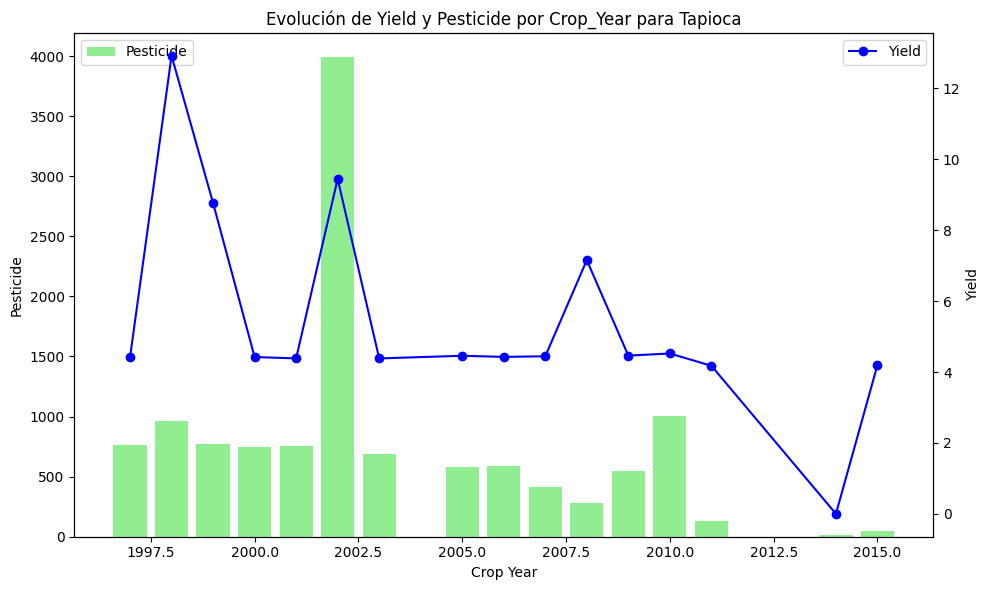

In [28]:
for name, df in work_dfs.items():
    grafico_base_rinde_variable(df, "Pesticide", name)

### Fertilizer

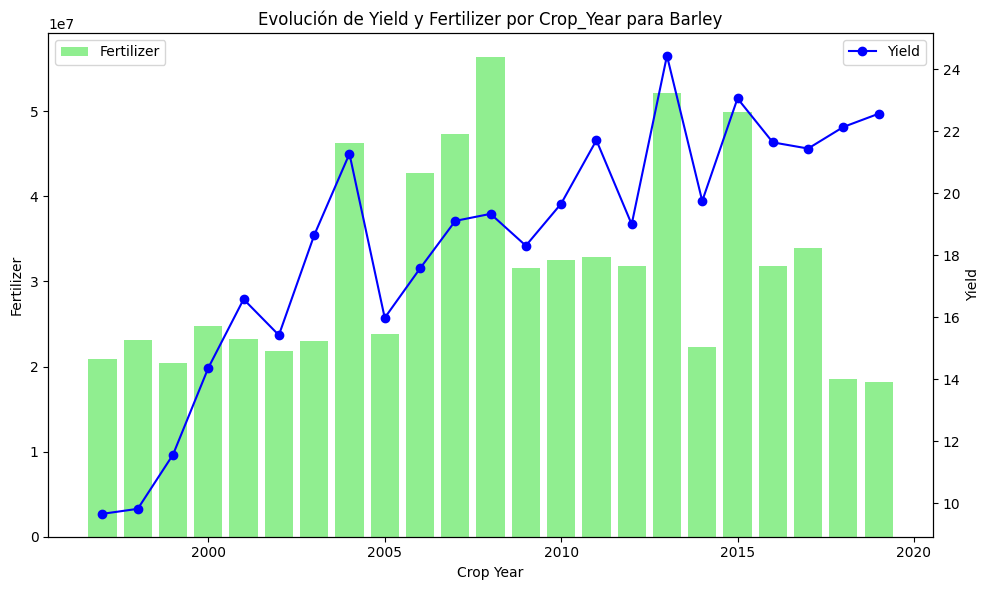

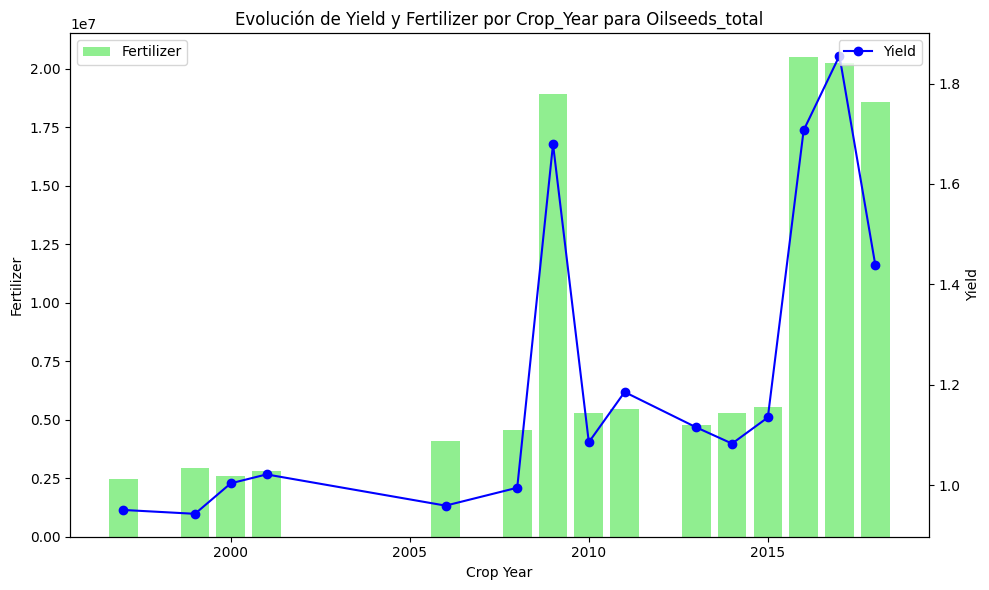

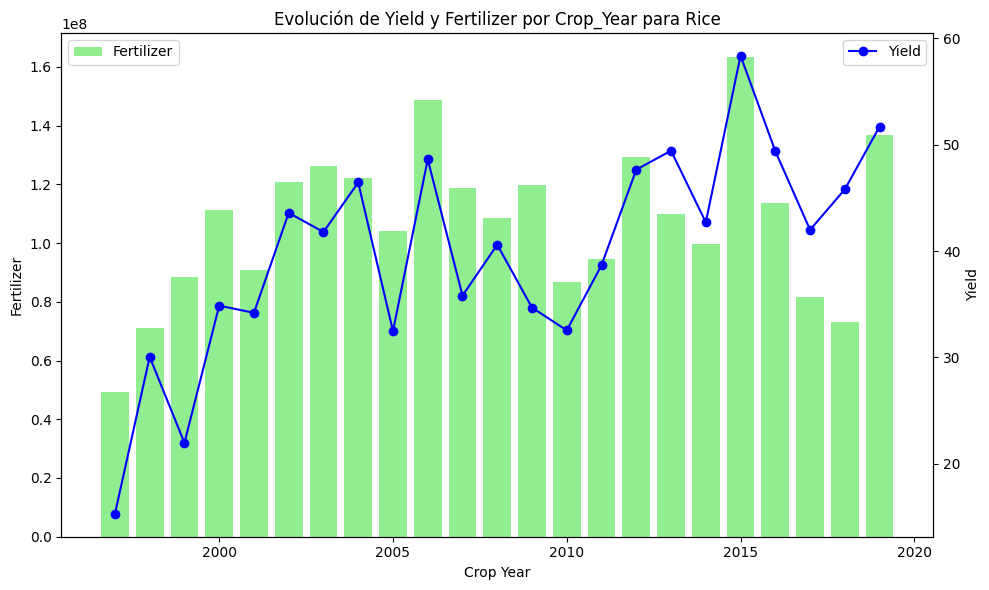

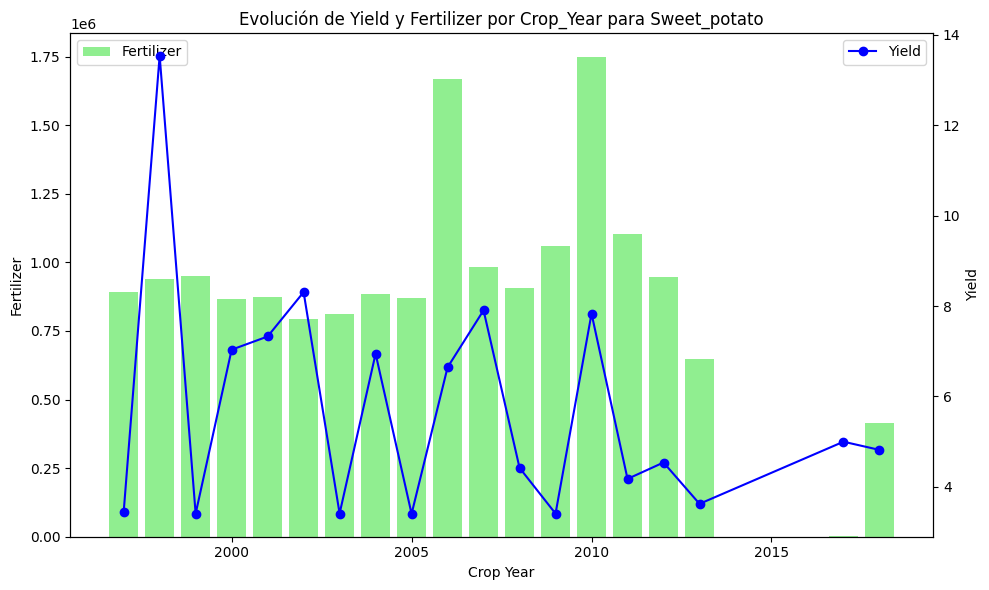

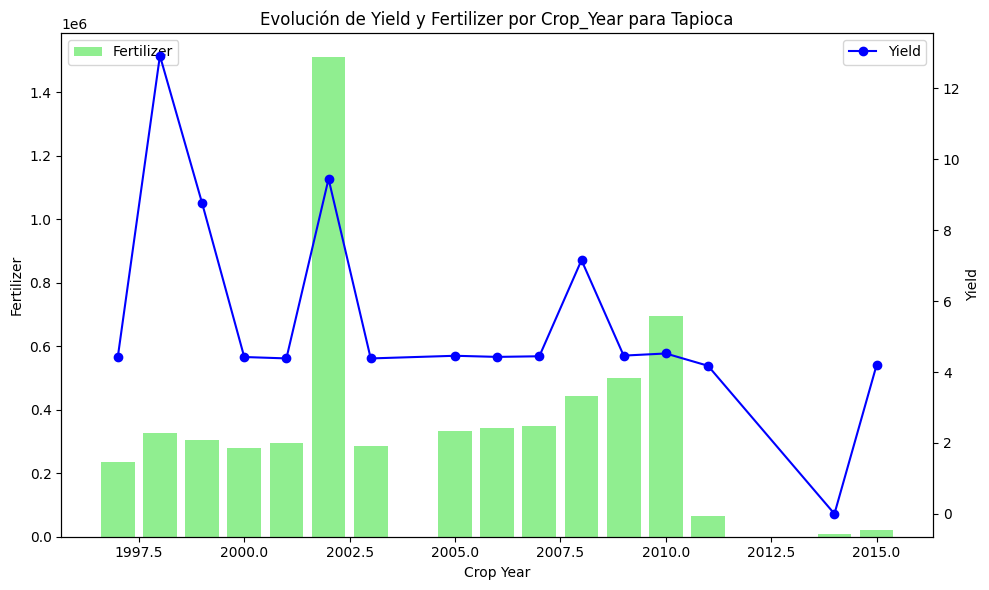

In [29]:
for name, df in work_dfs.items():
    grafico_base_rinde_variable(df, "Fertilizer", name)

### Annual Rainfall

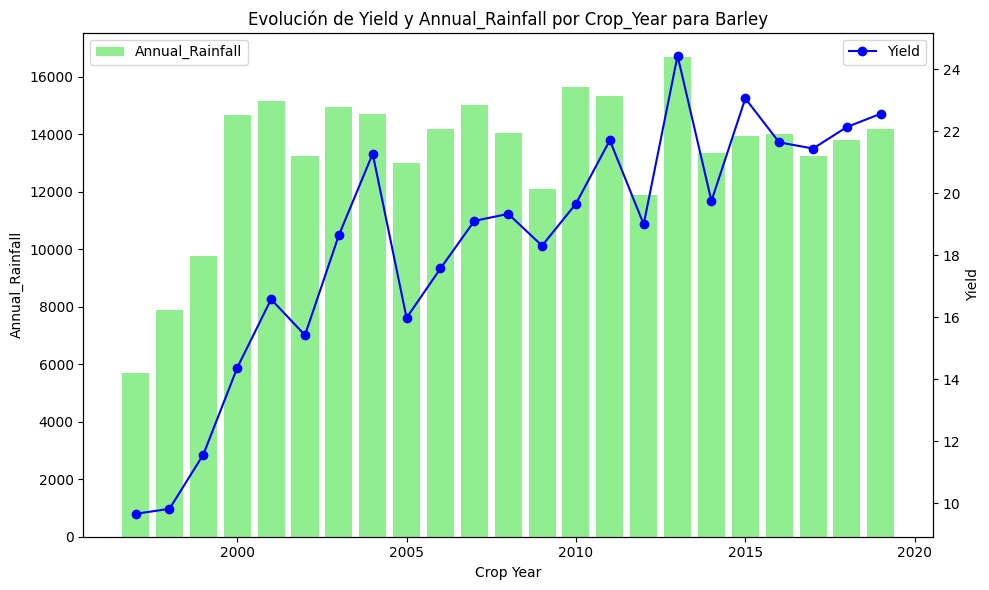

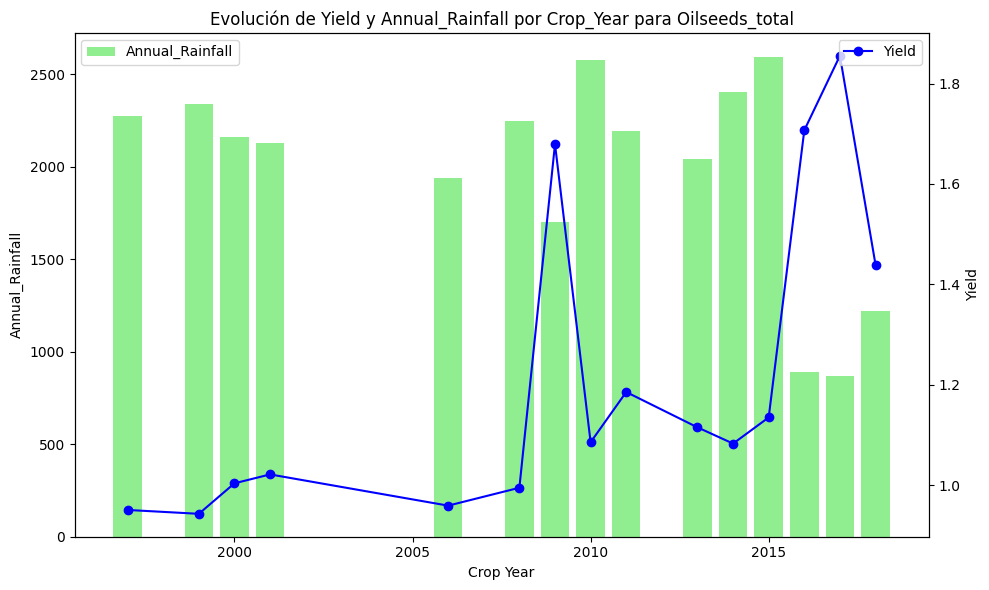

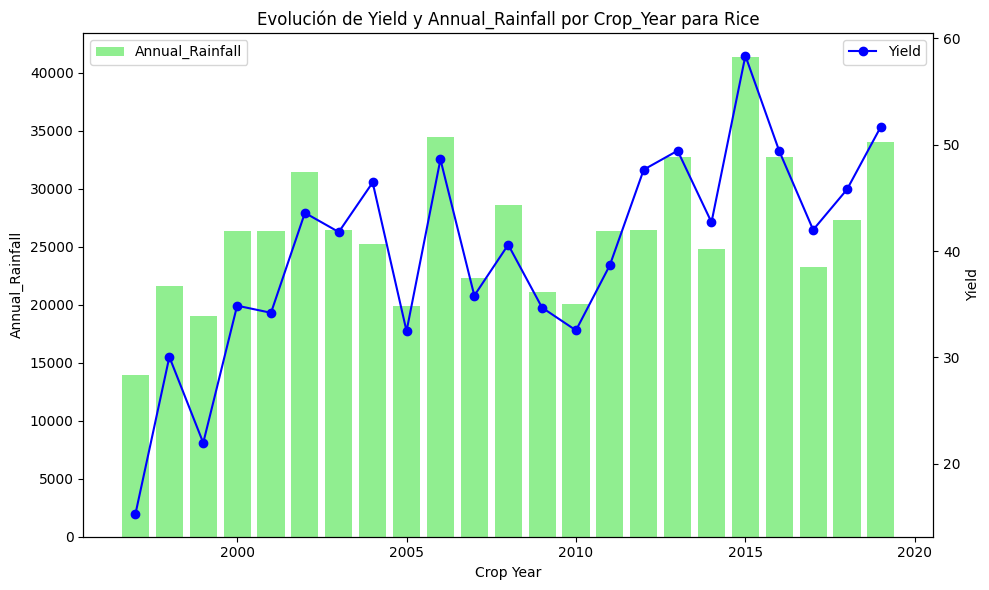

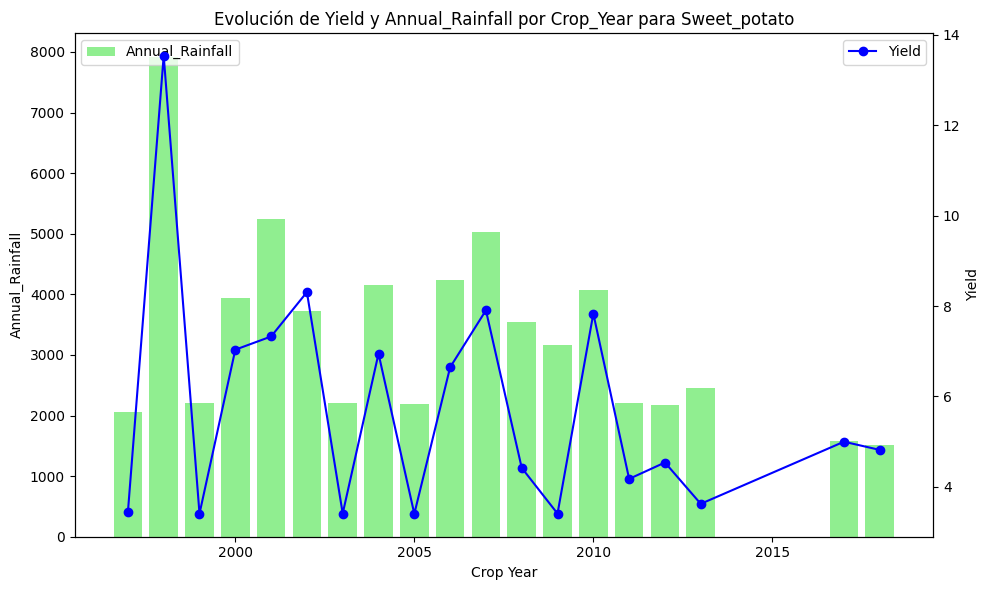

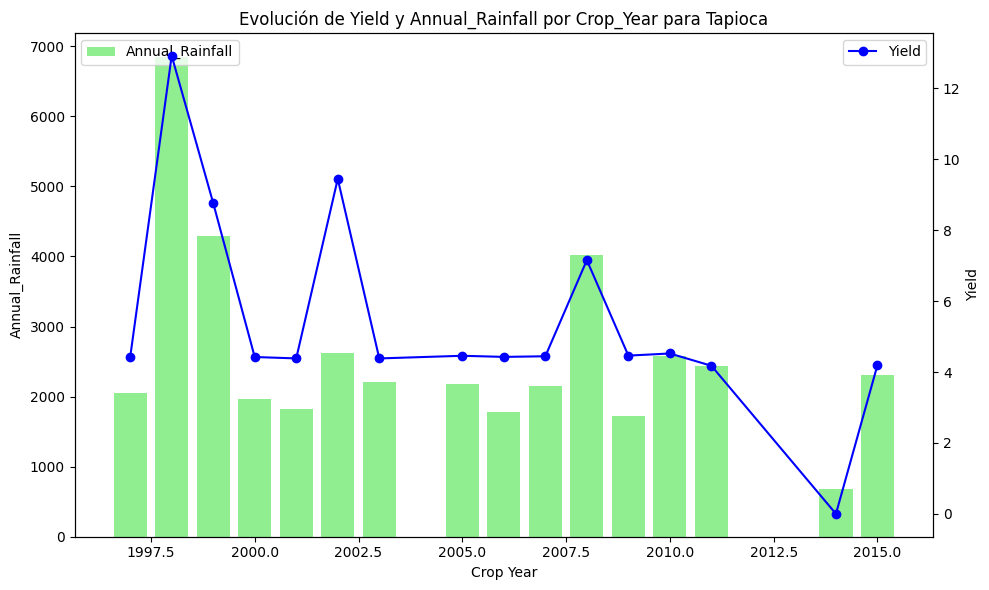

In [30]:
for name, df in work_dfs.items():
    grafico_base_rinde_variable(df, "Annual_Rainfall", name)